In [7]:
import pickle

pickle_in = open("X_12classes227.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_12classes227.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [8]:
X_train = X[:11785,:]
X_test = X[11785:,:]
y_train = y[:11785,:]
y_test = y[11785:,:]

print("X train shape " + str(X_train.shape))
print("X test shape " + str(X_test.shape))
print("y train shape " + str(y_train.shape))
print("y test shape " + str(y_test.shape))


X train shape (11785, 227, 227, 3)
X test shape (2498, 227, 227, 3)
y train shape (11785, 12)
y test shape (2498, 12)


In [9]:
import numpy as np
from keras import layers
from keras.layers import Input, Dropout, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.utils import layer_utils
from tensorflow.keras.callbacks import TensorBoard
from keras.initializers import glorot_uniform
import time

In [10]:
def AnimalModel(input_shape, classes = 5):
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    #X = ZeroPadding2D((3, 3))(X_input)

   
    #1st phase, phase ends at a maxpool
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(96, (11, 11), strides = (4, 4), name = 'conv0')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((3, 3), strides = (2, 2), name='max_pool0')(X)
    
    #2nd phase
    X = Conv2D(256, (11, 11), padding ='same', name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides = (2, 2), name='max_pool1')(X)
    
    #3rd phase
    X = Conv2D(384, (3, 3), padding ='same', name = 'conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3, 3), padding ='same', name = 'conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3, 3), padding ='same', name = 'conv5')(X)
    X = BatchNormalization(axis = 3, name = 'bn5')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides = (2, 2), name='max_pool5')(X)
    #X = AveragePooling2D(pool_size=(2, 2), name = 'avg_pool')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = GlobalAveragePooling2D(name='avg')(X)
    #X = Dense(4096, activation='relu', name='fc6')(X)
    #X = Dropout(0.5)(X)
    #X = Dense(4096, activation='relu', name='fc7')(X)
    #X = Dropout(0.5)(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='AnimalModel')
    
    ### END CODE HERE ###
    
    return model

In [11]:
#WildlifeModel = AnimalModel(X.shape[1:])
#print(X.shape[1:])

WildlifeModel = AnimalModel(input_shape = (227,227,3), classes = 12)

In [12]:
WildlifeModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation_6 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       2973952   
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024      
__________

In [7]:
NAME = "AlexNet{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='Network comparison-random-200-12 classes/{}'.format(NAME))

t = time.time()
WildlifeModel.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
WildlifeModel.fit(X_train, y_train, epochs = 200, batch_size = 16, validation_data=(X_test, y_test), callbacks=[tensorboard])
print('Training time: %s' % (t - time.time()))
#the deeper we go, less epochs are required to get better acc

Instructions for updating:
Use tf.cast instead.
Train on 11785 samples, validate on 2498 samples
Epoch 1/200
11785/11785 [==============================] - 40s 3ms/step - loss: 1.7356 - acc: 0.4137 - val_loss: 1.4582 - val_acc: 0.5288
Epoch 2/200
11785/11785 [==============================] - 36s 3ms/step - loss: 1.2646 - acc: 0.5764 - val_loss: 1.1196 - val_acc: 0.6233
Epoch 3/200
11785/11785 [==============================] - 37s 3ms/step - loss: 1.0421 - acc: 0.6501 - val_loss: 0.9960 - val_acc: 0.6801
Epoch 4/200
11785/11785 [==============================] - 37s 3ms/step - loss: 0.9146 - acc: 0.6967 - val_loss: 0.8432 - val_acc: 0.7214
Epoch 5/200
11785/11785 [==============================] - 37s 3ms/step - loss: 0.7913 - acc: 0.7360 - val_loss: 0.7559 - val_acc: 0.7462
Epoch 6/200
11785/11785 [==============================] - 37s 3ms/step - loss: 0.6856 - acc: 0.7728 - val_loss: 0.7129 - val_acc: 0.7558
Epoch 7/200
11785/11785 [==============================] - 37s 3ms/step - l

Epoch 116/200
11785/11785 [==============================] - 37s 3ms/step - loss: 0.0086 - acc: 0.9969 - val_loss: 0.4096 - val_acc: 0.9303
Epoch 117/200
11785/11785 [==============================] - 36s 3ms/step - loss: 0.0200 - acc: 0.9936 - val_loss: 0.4852 - val_acc: 0.9135
Epoch 118/200
11785/11785 [==============================] - 36s 3ms/step - loss: 0.0171 - acc: 0.9946 - val_loss: 0.4790 - val_acc: 0.9187
Epoch 119/200
11785/11785 [==============================] - 37s 3ms/step - loss: 0.0083 - acc: 0.9972 - val_loss: 0.4159 - val_acc: 0.9303
Epoch 120/200
11785/11785 [==============================] - 36s 3ms/step - loss: 0.0170 - acc: 0.9938 - val_loss: 0.4936 - val_acc: 0.9143
Epoch 121/200
11785/11785 [==============================] - 36s 3ms/step - loss: 0.0211 - acc: 0.9936 - val_loss: 0.4608 - val_acc: 0.9171
Epoch 122/200
11785/11785 [==============================] - 36s 3ms/step - loss: 0.0181 - acc: 0.9942 - val_loss: 0.4959 - val_acc: 0.9135
Epoch 123/200
11785/

In [8]:
preds = WildlifeModel.evaluate(x = X_test, y = y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2498/2498 [==============================] - 4s 2ms/step

Loss = 0.4956667341231881
Test Accuracy = 0.923138510808647


In [9]:
WildlifeModel.save('TransferLearning-AlexNet-new.h5')

In [1]:
from keras.models import load_model
import cv2
import scipy.misc
from matplotlib.pyplot import imshow
import numpy as np

Using TensorFlow backend.


In [2]:
WildlifeModel = load_model('TransferLearning-AlexNet-new.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


[[0.    0.616 0.001 0.    0.    0.383 0.    0.    0.    0.    0.    0.   ]]
The animal type is :Cheetah


E:\Program\Anaconda-Python\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


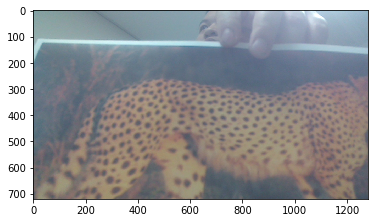

In [8]:
img_path = 'Thesis/Perfect/2018-01-29 00_03_40.535652.jpeg'
img_array = cv2.imread(img_path)
new_array = cv2.resize(img_array, (227, 227))
x = np.array(new_array).reshape(-1, 227, 227, 3)
x = x/255.0

result = np.around(WildlifeModel.predict(x),decimals = 3)
print(result)
#0=buffalo, 1=cheetah, 2=elephant, 3=gazelle, 4=giraffe, 5=hartebeest, 6=lionfemale&cub, 7=lionmale, 
#8=ostrict, 9=secretarybird, 10=wildebeest, 11=zebra 
my_image = scipy.misc.imread(img_path)
imshow(my_image)

categories = ["Buffalo", "Cheetah", "Elephant", "GazelleThomsons", "Giraffe", "Hartebeest", 
              "Lionfemale&Cub", "Lionmale", "Ostrich", "SecretaryBird", "Wildebeest", "Zebra"]
print('The animal type is :{}'.format(categories[np.argmax(result)]))